##**Notes/reminders:**

* Clinical data has been excluded
(because they will still be extracted from the medical records, classifying the oligosymptomatic patients separately, allowing a better evaluation of the machine)

* Version used in the code below: 
- Python version: 3.11.7
- scikit-learn version: 1.2.2
- imbalanced-learn version: 0.12.1
- scikit-optimize version: 0.10.1

* It uses only one machine-learning evaluation model, several of which will be used in the final master's work. The current script corresponds to a training script developed in conjunction with pacific (more complex).

## Dictionary:
* In column: SEX
 * M = 0
 * F = 1

* In column: HAM/TSP
* No myelopathy = 0
* HAM/TSP = 1

# **Categorized data_1:**
named as = cat_data_1

Creation of a new data table, transforming the binary variables referring to urinary dysfunctions into categorical numerical variables, exclusion of uninformative columns and categorization of pain subtypes. Including the conversion of "Hipereflexia" and "Hiperflexia em MMII", como somente "Hipereflexia.

Dictionary:
- Urinary_symptoms:
 - Polyuria: 1 +
 - Neurogenic bladder: 2 +
 - Neurogenic bladder + urinary incontinence:3
 - Nocturia: 4 +
 - Nocturia + urinary incontinence: 5
 - Dysuria: 6
 - Dysuria + neurogenic bladder: 7

- Pain:
 - non-specific pain: 1
 - joint pain: 2
 - lower back pain: 3
 - lower limb pain: 4
 - lower limb pain + other site of pain: 5

- Weakenes:
 - normal levels of strength: 0
 - weakness or lost of stregth: 1

- Wandering:
 - normal walking: 0
 - abnormal walking: 1

At this point, df is the new data set with the change in the selected characteristics

# **Categorized data_2:**
named as = cat_data_2

- Urinary_symptoms:
 - Polyuria: 1 +
 - Neurogenic bladder: 2 +
 - Neurogenic bladder + urinary incontinence:3
 - Nocturia: 4 +
 - Nocturia + urinary incontinence: 5
 - Dysuria: 6
 - Dysuria + neurogenic bladder: 7

- Pain:
 - non-specific pain: 1
 - joint pain: 2
 - lower back pain: 3
 - lower limb pain: 4
 - lower limb pain + other site of pain: 5

The presence of any of the following variables resulted in the dataset being converted to 1:
 - diabetes
 - obesity
 - diabetes
 - osteoporosis
 - chronic kidney disease
 - Hypothyroidism
 - arthrosis
 - hypertension
 - arthrosis/ diabetes/hypertension
 - arthrosis/diabetes/hypertension

- Mental disorders:
The presence of any of the following variables resulted in the dataset being converted to 2:
 - psychotic breaks/compulsive crises
 - insomnia
 - outbreaks/insomnia/crisis
 - schizophrenia
 - anxiety
 - psychiatric illness
 - anxiety/depression
 - depression


- Neurological disorder/symptoms:
The presence of any of the following variables resulted in the dataset being converted to 1:
 - Paresthesia
 - Weakness
 - Numbness
 - Hypermotility

- The presence of any of the following variables resulted in the dataset being converted to 2:
 - Paresis
 - Hypereflexia
 - Spasticity
 - Gait (related to locomotion problems)

In the event of the presence of the above-mentioned symptoms associated with the disorders, the sample was converted into 2


#**Categorized data_3:**
named as = cat_data_3

 Urinary symptoms:
- Polyuria: 1 +
- Dysuria: 2
- Urinary incontinence: 3
- Nocturia: 4 +

Pain:
- non-specific pain: 1
- Joint pain: 2
- Lower back pain: 3
- lower limb pain: 4
- Lower limb pain + other site of pain: 5

Neurological disorder/symptoms: The presence of any of the following variables caused the data set to be converted into the respective numbers described below:
- Paresthesia: 1 
- Paresis/weakness/loss of strength: 2 
- Hypereflexia: 3 
- Paresthesia/hypereflexia: 4 
- Paresis/paresthesia: 5 
- Spasticity: 6 
- Hypereflexia/spasticity or gait: 7 
- Paresis/spasticity or gait: 8 
- Neurogenic bladder: 9
- Neurogenic bladder+Paresthesia: 10
- Neurogenic bladder+paresis: 11

Mental disorders:
The presence of any of the following variables caused the data set to be converted into the respective numbers described below:
 - Psychotic breaks/compulsive crises: 1
 - Insomnia: 2
 - Outbreak/insomnia/crisis: 3
 - Schizophrenia: 4
 - Anxiety: 5
 - Psychiatric illness: 6
 - Anxiety/depression: 7
 - Depression : 8

Chronic diseases:
 - Diabetes: 1
 - Obesity: 2
 - Diabetes/Obesity: 3
 - Osteoporosis: 4
 - Chronic kidney disease: 5
 - Hypothyroidism: 6
 - Arthrosis: 7
 - Arthrosis/diabetes: 8
 - Hypertension: 9
 - Arthrosis/diabetes/hypertension: 10
 - Arthrosis/diabetes/hypertension: 11




# **Loading data and packages**

**Libraries import**

In [1]:
import os
import warnings
import shutil
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, ttest_ind
from joblib import dump, load
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import statsmodels.api as sm
from openpyxl import Workbook
from openpyxl.utils.dataframe import dataframe_to_rows
from ipywidgets import interact, widgets

warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

import ipywidgets as widgets
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.model_selection import (
    train_test_split, RepeatedStratifiedKFold, LeaveOneOut, cross_validate
)
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    make_scorer, confusion_matrix, classification_report, roc_curve, auc
)
from sklearn.ensemble import (
    ExtraTreesClassifier, RandomForestClassifier,
    AdaBoostClassifier, GradientBoostingClassifier
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.metrics import geometric_mean_score

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import ipywidgets as widgets
from ipywidgets import interact
from imblearn.pipeline import Pipeline as ImbPipeline


from sklearn.model_selection import (
    train_test_split, RepeatedStratifiedKFold, LeaveOneOut, cross_validate
)
from sklearn.preprocessing import MinMaxScaler
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    make_scorer, confusion_matrix, classification_report, roc_curve, auc
)
from sklearn.ensemble import (
    ExtraTreesClassifier, RandomForestClassifier,
    AdaBoostClassifier, GradientBoostingClassifier
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.metrics import geometric_mean_score
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import confusion_matrix, balanced_accuracy_score
from openpyxl import Workbook
from openpyxl.utils.dataframe import dataframe_to_rows
import os
import shutil
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# Defining a global variable to store the DataFrame
df = pd.DataFrame()
cat_data_3 = ('..\\datasets\\df_cat_3.csv')
# Function to load and process the selected dataset
def load_and_process_data(selected_data):
    global df
    if selected_data == 'Categorical Data 3':
        df = pd.read_table(cat_data_3, sep=',')
        df = df.rename(columns={'SEXO':'Sexo'})
        df['Sexo'] = df['Sexo'].replace('M', 0)
        df['Sexo'] = df['Sexo'].replace('F', 1)
        df['HAM/TSP'] = df['HAM/TSP'].replace('NÃO', 0)
        df['HAM/TSP'] = df['HAM/TSP'].replace('SIM', 1)
        df = df.drop(['REGISTRO', 'NUM AMO'], axis=1)
        df['HAM/TSP'] = pd.to_numeric(df['HAM/TSP'], errors='coerce')

    else:
        df = pd.DataFrame()

    print("Data Loaded and Processed Successfully!")
    return df.head()  # Shows the first rows of the loaded and processed dataset

# List of dataset options
data_options = ['Categorical Data 3']

# Selection widget to choose the data set
data_selector = widgets.Dropdown(
    options=data_options,
    description='Select Data:'
)

# Interactive function to load and process the selected data set
@interact(selected_data=data_selector)
def load_and_process_selected_data(selected_data):
    return load_and_process_data(selected_data)


interactive(children=(Dropdown(description='Select Data:', options=('Categorical Data 3',), value='Categorical…

# **Exploratory analysis**


**Target frequency distribution (HAM/TSP)**

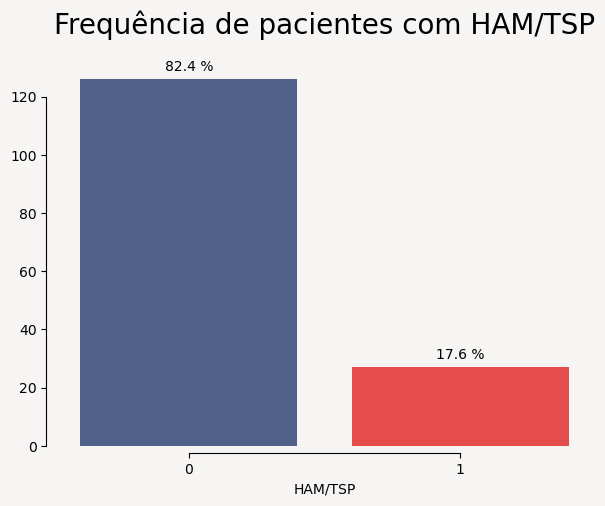

In [4]:
# Color palette
mypal = ['#465d91', '#FFFFE0', '#FF3232']

# Bar Graph for Distribution of Variables
plt.figure(figsize=(7, 5), facecolor='#F6F5F4')
total = float(len(df))
ax = sns.countplot(x=df['HAM/TSP'], palette=mypal[0::2])
ax.set_facecolor('#F6F5F4')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:1.1f} %'.format((height / total) * 100), ha="center")

ax.set_title('Frequência de pacientes com HAM/TSP', fontsize=20, y=1.05)
ax.set_ylabel('')
sns.despine(right=True)
sns.despine(offset=5, trim=True)

# Save the graphic in JPEG
#plt.savefig('C:\\Users\\mathe\\OneDrive\\Documentos\\Python_Scripts\\MBL2_ML\\Analise_exploratória\\' + 'Frequência_HAM_TSP.jpeg')
plt.savefig('..\\exploratory_analysis\\Frequência_HAM_TSP.jpeg')

# Show the graphic
plt.show()

**Pearson correlation matrix initial dataset (heatmap):**

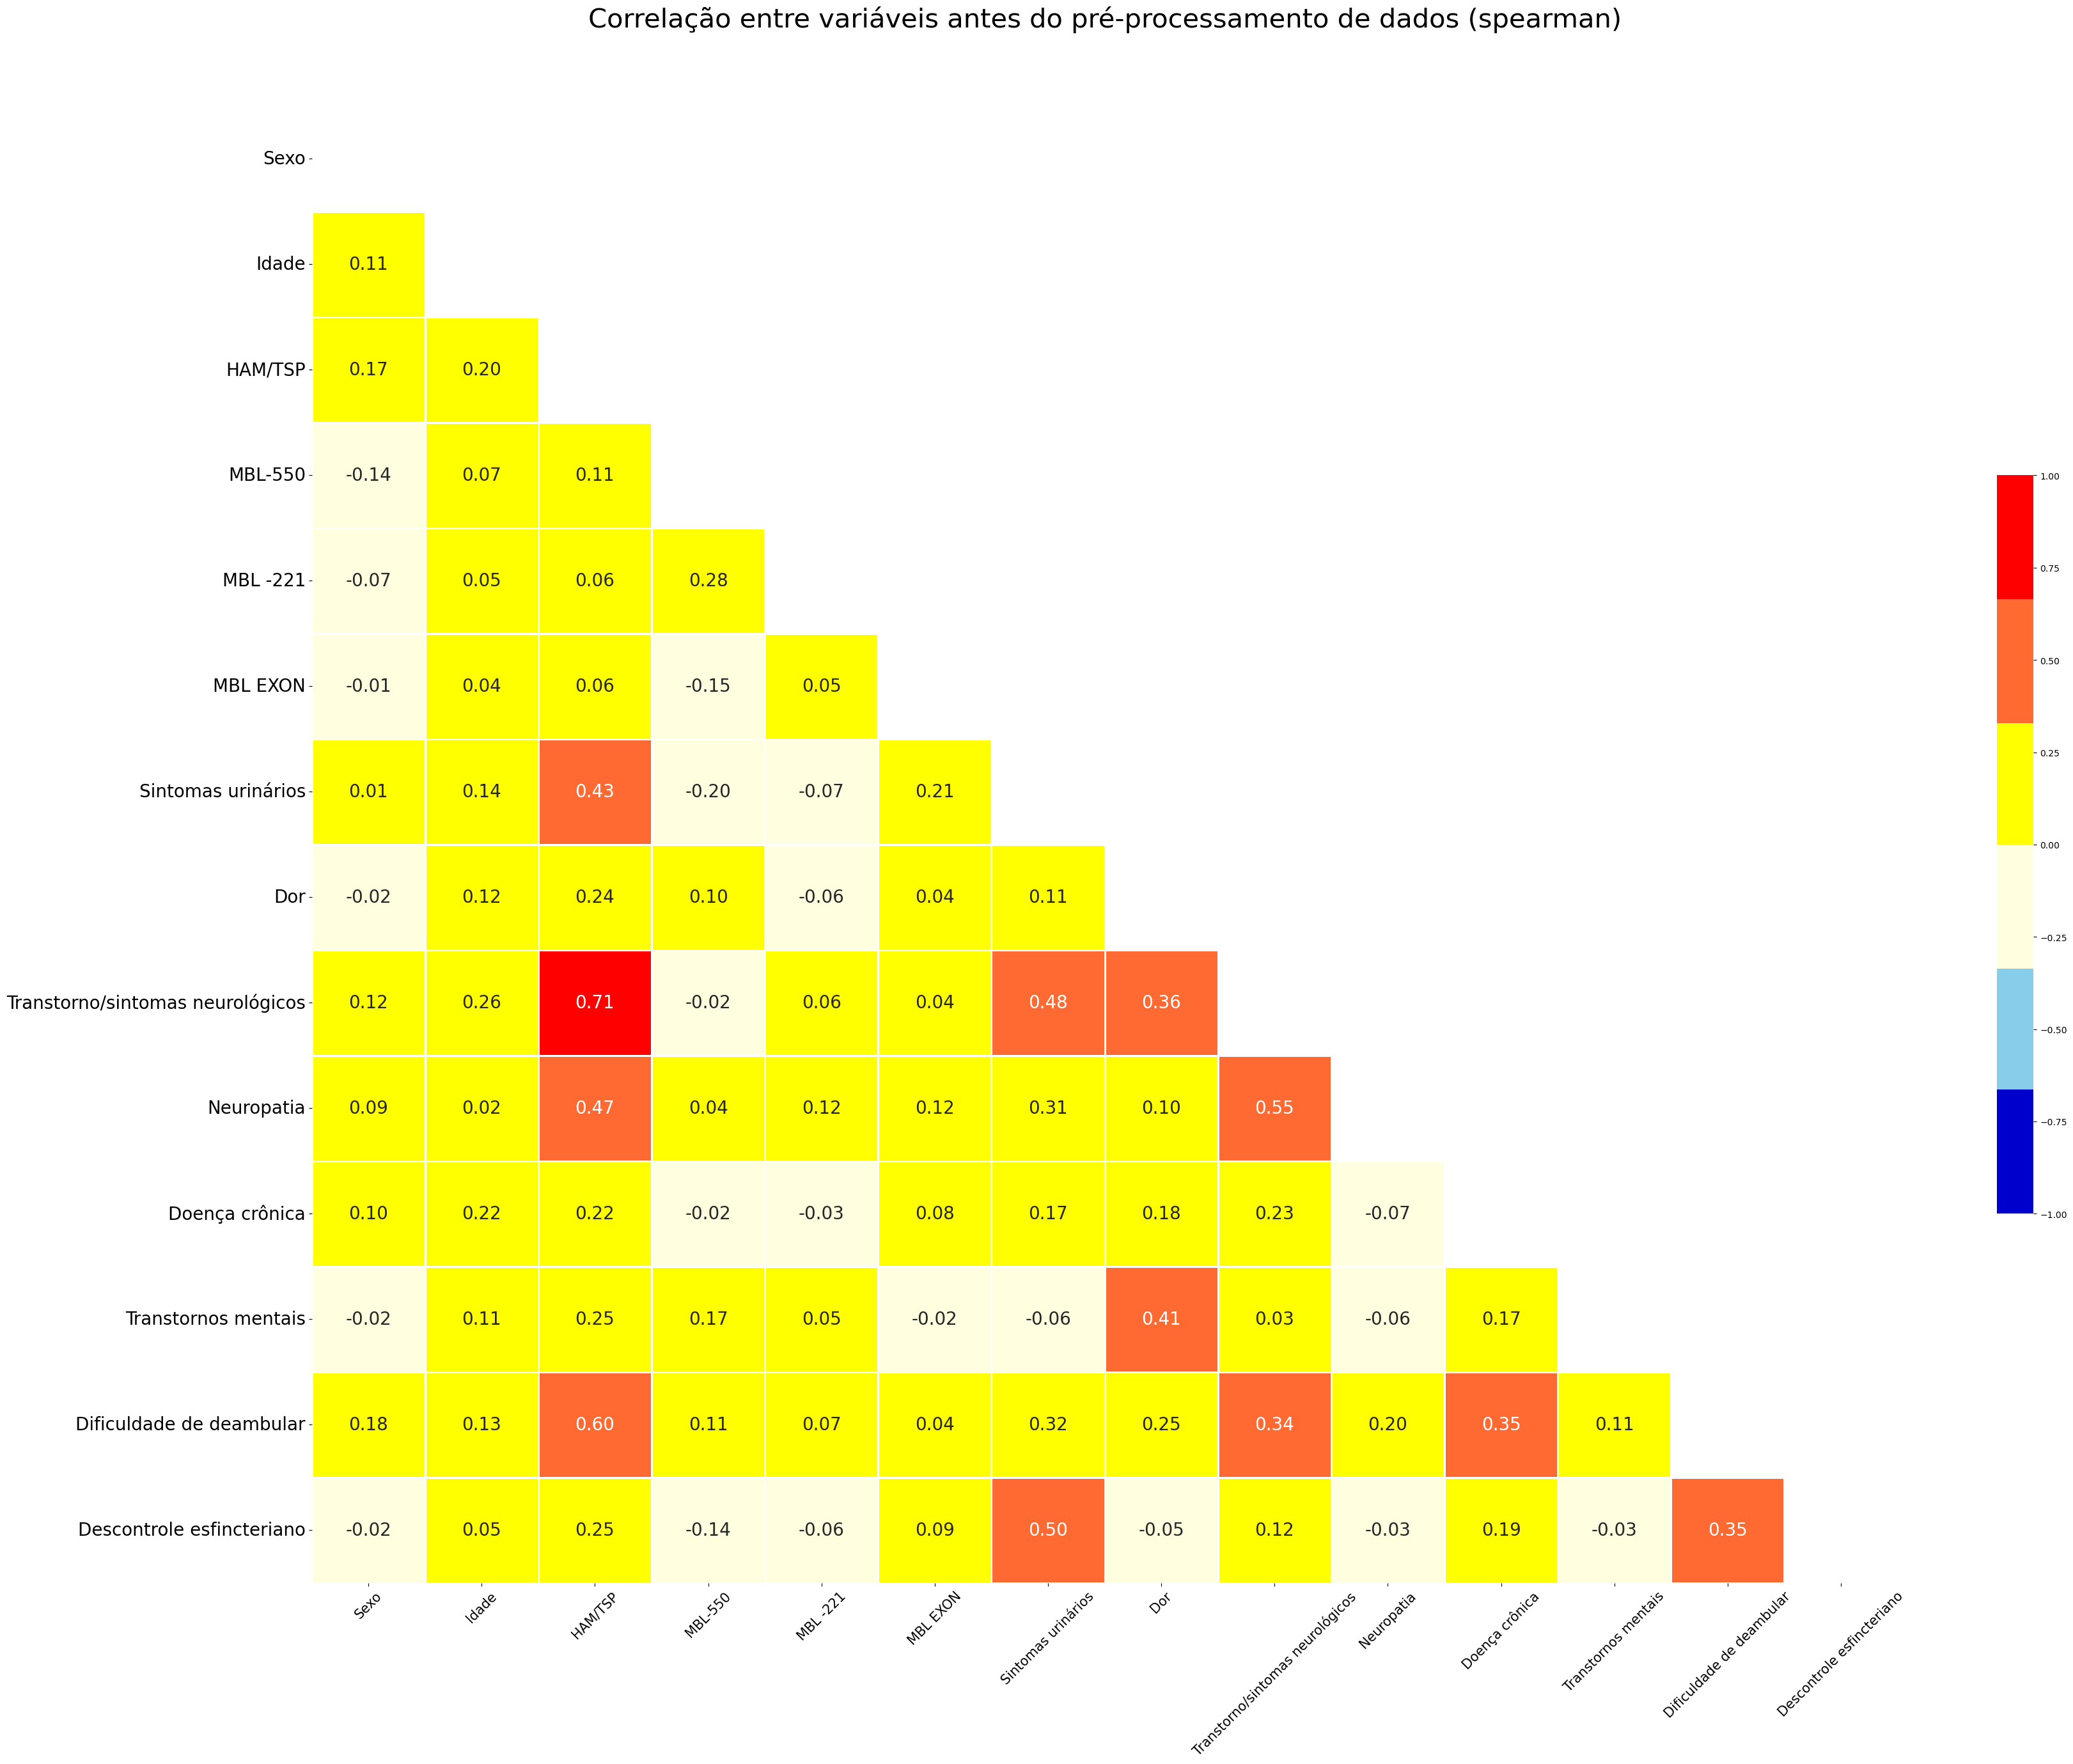

In [5]:
# Correlation
mypal= ['#0000CD', '#87CEEB', '#FFFFE0','#FFFF00', '#ff6a32','#FF0000']
metodo_correlacao = "spearman"
df_ = df

corr = df_.corr(method= metodo_correlacao)
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(40, 30), facecolor=None)
cmap = sns.color_palette(mypal, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, vmin=-1.0, center=0, annot=True,
            square=False, linewidths=1, cbar_kws={"shrink": 0.5}, fmt='.2f', annot_kws={"size": 20})
plt.yticks(rotation=0, fontsize=20)
plt.xticks(rotation=45, fontsize=15)
ax.set_title("Correlação entre variáveis antes do pré-processamento de dados ("+metodo_correlacao+")", fontsize=30, y= 1.05);


# Save the graphic in PDF
plt.savefig('..\\exploratory_analysis\\' + 'initial_df_plot_heatmap_corr_pearson.pdf')

plt.show()

**Linear regression**

In [7]:
y = df['HAM/TSP']  # Target variable
X = df.drop('HAM/TSP', axis=1)  # Predictor variables

# Add a constant to DataFrame X to adjust the intercept in the model
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Obtain the p-values for each independent variable
p_values = model.pvalues

print(p_values)

const                               7.296953e-01
Sexo                                6.565907e-01
Idade                               9.047988e-01
MBL-550                             5.199580e-02
MBL -221                            3.503602e-01
MBL EXON                            7.176807e-01
Sintomas urinários                  7.569090e-01
Dor                                 7.250223e-01
Transtorno/sintomas neurológicos    6.002104e-10
Neuropatia                          1.751511e-02
Doença crônica                      6.440645e-01
Transtornos mentais                 5.458061e-03
Dificuldade de deambular            6.909262e-07
Descontrole esfincteriano           5.782415e-01
dtype: float64


In [8]:
# Count the total number of patients with HAM/TSP in relation to DataFrame 'y'
pacientes_com_HAM_feminino = ((df['Sexo'] == 1) & (df['HAM/TSP'] == 1)).sum()
print(f'Pacientes do sexo Feminino com HAM/TSP: {pacientes_com_HAM_feminino}')

# Count the total number of male patients without HAM/TSP
pacientes_com_HAM_masculino = ((df['Sexo'] == 0) & (df['HAM/TSP'] == 1)).sum()
print(f'Pacientes do sexo Masculino com HAM/TSP: {pacientes_com_HAM_masculino}')

# Count the total number of female patients without HAM/TSP
pacientes_sem_HAM_feminino = ((df['Sexo'] == 1) & (df['HAM/TSP'] == 0)).sum()
print(f'Pacientes do sexo Feminino sem HAM/TSP: {pacientes_sem_HAM_feminino}')

# Count the total number of male patients without HAM/TSP
pacientes_sem_HAM_masculino = ((df['Sexo'] == 0) & (df['HAM/TSP'] == 0)).sum()
print(f'Pacientes do sexo Masculino sem HAM/TSP: {pacientes_sem_HAM_masculino}')

Pacientes do sexo Feminino com HAM/TSP: 21
Pacientes do sexo Masculino com HAM/TSP: 6
Pacientes do sexo Feminino sem HAM/TSP: 71
Pacientes do sexo Masculino sem HAM/TSP: 55


**T-student**
- Evaluation of the relationship between the independent variables and the target outcome


In [9]:
# List to store the characteristics that pass the t-test
selected_features_ttest = []

# Iterate through the columns
for feature in df.columns:
    # Extract data for each class
    class_0 = df.loc[df['HAM/TSP'] == 0, feature]
    class_1 = df.loc[df['HAM/TSP'] == 1, feature]

    # Perform the t-test
    _, p_value = ttest_ind(class_0, class_1)

    # If the p-value is less than a threshold (e.g. 0.05), consider the characteristic significant
    if p_value < 0.05:
        selected_features_ttest.append(feature)

# DataFrame with only the characteristics selected by the t-test
df_selected = df[selected_features_ttest]

# Target directory
destination_dir = '..\\exploratory_analysis\\'

print(f'Out of {len(X.columns)} features, {len(selected_features_ttest)} were selected by the t-test: ')
with open('T-student_exploratory_Analysis.txt', 'w') as arquivo:
    for feature in selected_features_ttest:
        print(f'- {feature}', file=arquivo)

# Target directory
shutil.copyfile('T-student_exploratory_Analysis.txt', os.path.join(destination_dir, 'T-student_exploratory_Analysis.txt'))

Out of 14 features, 11 were selected by the t-test: 


'..\\exploratory_analysis\\T-student_exploratory_Analysis.txt'

In [10]:
# List to store the characteristics that pass the t-test and their p-values
selected_features_ttest = []

# Define the characteristics (excluding the 'HAM/TSP' class column)
features = [col for col in df.columns if col != 'HAM/TSP']

# Iterate through the characteristic columns
for feature in features:
    # Extract data for each class
    class_0 = df.loc[df['HAM/TSP'] == 0, feature]
    class_1 = df.loc[df['HAM/TSP'] == 1, feature]

    # Perform the t-test
    _, p_value = ttest_ind(class_0, class_1)

    # If the p-value is less than a threshold (e.g. 0.05), consider the characteristic significant
    if p_value < 0.05:
        selected_features_ttest.append((feature, p_value))

# DataFrame with only the characteristics selected by the t-test
selected_features_names = [feature for feature, p_value in selected_features_ttest]
df_selected = df[selected_features_names]

# Target directory
destination_dir = '..\\exploratory_analysis\\'
print(f'Out of {len(features)} features, {len(selected_features_ttest)} were selected by the t-test: ')
with open('T-student_exploratory_Analysis.txt', 'w') as arquivo:
    for feature, p_value in selected_features_ttest:
        print(f'- {feature} (p-value: {p_value:.5f})', file=arquivo)

# Copy the file to the destination directory
shutil.copyfile('T-student_exploratory_Analysis.txt', os.path.join(destination_dir, 'T-student_exploratory_Analysis.txt'))


Out of 13 features, 10 were selected by the t-test: 


'..\\exploratory_analysis\\T-student_exploratory_Analysis.txt'

# **Feature selection**

**Definition of variables, models and functions**

In [11]:
classifiers = {
    "Logistic Regression": LogisticRegression(solver="lbfgs", max_iter=1000, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(2),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Gaussian Naive Bayes": GaussianNB(),
    "Linear Discriminant Analysis": LinearDiscriminantAnalysis(),
    "Support Vector Classifier": SVC(kernel='linear', random_state=42, probability=True),
    "Multi-layer Perceptron": MLPClassifier(random_state=42)
}


**Feature selection (K-best)**

In [12]:
def perform_feature_selection(df, classifiers, model_name):
    # Test different values of "k" for SelectKBest
    all_results = []
    for k in range(1, X.shape[1] + 1):  
        selector = SelectKBest(score_func=f_classif, k=k)
        X_selected = selector.fit_transform(X, y)

        resultados = []

        for item, nome in zip(classifiers.values(), model_name):
            item.fit(X_selected, y)
            y_pred = item.predict(X_selected)

            tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
            balanced_acc = balanced_accuracy_score(y, y_pred)

            resultados.append((nome, balanced_acc))

        all_results.append((k, resultados))

    # Create a DataFrame to store the results
    df_results = pd.DataFrame(columns=["k"] + model_name)

    # Add the results to the DataFrame
    for k, resultados in all_results:
        balanced_accs = [balanced_acc for _, balanced_acc in resultados]
        df_results.loc[k] = [k] + balanced_accs

    # Calculate the average of each row, excluding the first column
    df_results["Balanced Accuracy"] = df_results.iloc[:, 1:].mean(axis=1)

    # Select the five rows with the highest averages
    top_5_mean = df_results.nlargest(5, "Balanced Accuracy")

    # Create an Excel file
    wb = Workbook()

    # Add the first tab with the results
    ws1 = wb.active
    ws1.title = "Resultados"

    # Add the results to Excel
    for r in dataframe_to_rows(df_results, index=True, header=True):
        ws1.append(r)

    # Create the second tab for the five rows with the highest averages
    ws2 = wb.create_sheet(title="Top 5 Médias")

    # Add the results to Excel
    for r in dataframe_to_rows(top_5_mean, index=True, header=True):
        ws2.append(r)

    # Save the Excel file
    feature_selection = "resultados_feature_selection.xlsx"
    wb.save(feature_selection)

    # Target directory to save the file
    destination_dir = "..\\exploratory_analysis\\"

    # Copy the file to the destination directory
    shutil.copyfile(feature_selection, os.path.join(destination_dir, feature_selection))

    return top_5_mean


**Evaluation of multicollinearity**

In [13]:
def calculate_vif(X, caminho_arquivo):
    # Adds a column of constants to the DataFrame
    df_with_const = add_constant(pd.DataFrame(X, columns=X.columns))

    # List for storing VIF results
    vif_data = []

    # Function to calculate the VIF in relation to the 'HAM/TSP' column
    def calculate_vif(column_index):
        return variance_inflation_factor(df_with_const.values, column_index)

    # Calculate the VIF for each variable in relation to the 'HAM/TSP' column
    for i, column in enumerate(df_with_const.columns):
        if column != 'const' and column != 'HAM/TSP':
            vif = calculate_vif(i)
            vif_data.append((column, vif))

    # Convert the results into a DataFrame
    vif_df = pd.DataFrame(vif_data, columns=["Variable", "VIF"])

    # Save the DataFrame in an Excel file
    vif_df.to_excel(caminho_arquivo, index=False)

caminho_arquivo = '..\\exploratory_analysis\\VIF_data.xlsx'
calculate_vif(X, caminho_arquivo)


# **Analysis of VIF+Feature selection**

In [14]:
for clf_name, clf in classifiers.items():
    pipeline = ImbPipeline([
        ('scaler', MinMaxScaler()),  
        ('undersampler', RandomUnderSampler(random_state=42)),  
        ('classifier', clf), 
        ('Feature selection', perform_feature_selection),
        ('VIF', calculate_vif)
    ])


In [15]:
# Selecting only the desired columns for X
selected_columns = ['Sexo', 'Idade',
                    'MBL-550', 'MBL -221', 'MBL EXON',
                    'Sintomas urinários',
                    'Dor',
                    'Transtorno/sintomas neurológicos']

# Updating X to contain only the selected columns
X = X[selected_columns]

# Combining X and y in a single DataFrame
df_combined = pd.concat([X, y], axis=1)

# Defining the path to save the file
df_combined_path = '..\\datasets\\df_combined.csv'

# Saving the combined DataFrame in a CSV file
df_combined.to_csv(df_combined_path, index=False)

print(f'O DataFrame combinado foi salvo em: {df_combined_path}')
df_combined.head

O DataFrame combinado foi salvo em: ..\datasets\df_combined.csv


<bound method NDFrame.head of      Sexo  Idade  MBL-550  MBL -221  MBL EXON  Sintomas urinários  Dor  \
0       0     68        1         0         2                   2    4   
1       1     32        0         0         1                   0    0   
2       0     54        2         1         0                   0    0   
3       0     36        1         0         0                   0    0   
4       0     41        1         1         1                   0    0   
..    ...    ...      ...       ...       ...                 ...  ...   
148     1     76        2         0         0                   0    0   
149     1     63        1         0         0                   0    2   
150     1     82        1         0         0                   0    2   
151     0     62        2         0         0                   0    1   
152     1     53        2         0         0                   0    1   

     Transtorno/sintomas neurológicos  HAM/TSP  
0                               